In [400]:
#Importing Required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from  datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import RFE,RFECV
from sklearn import svm
import seaborn as sns
%matplotlib inline

In [305]:
# Provide the path to the data
csv_path = 'D:\Assignment\Data Scientist Assignment-1\wine-dataset.csv'

In [306]:
# Read the csv file into a dataframe
wine_df = pd.read_csv(csv_path)

# Exploratory Data Analysis

In [307]:
# Display the loaded data
wine_df.head()

production date  fixed acidity  volatile acidity  citric acid  \
0        1998/7/9            7.4              0.70         0.00   
1       1996-8-30            7.8              0.88         0.00   
2        2001/2/6            7.8              0.76         0.04   
3       1998/4/22           11.2              0.28         0.56   
4        1999/2/4            7.4              0.70         0.00   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   
2             2.3      0.092                 15.0                  54.0   
3             1.9      0.075                 17.0                  60.0   
4             1.9      0.076                 11.0                  34.0   

   density    pH  sulphates  alcohol  quality  
0   0.9978  3.51       0.56      9.4        5  
1   0.9968  3.20       0.68      9.8        5  
2   0.9970  3.26       0.65      9.8        5  
3   0.9980  3.16       0.58      9.8        6  
4   0.9978  3.51       0.56      9.4        5

In [7]:
#Finding the columns that have NULL values #Finding 
wine_df.isnull().any()

production date         False
fixed acidity           False
volatile acidity         True
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                  True
pH                       True
sulphates               False
alcohol                  True
quality                 False
dtype: bool

In [8]:
#How many Nan Values in each column
wine_df.isnull().sum()

production date         0
fixed acidity           0
volatile acidity        1
citric acid             0
residual sugar          0
chlorides               5
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      1
sulphates               0
alcohol                 1
quality                 0
dtype: int64

In [371]:
#Replace NULL values with median
wine_df_cleaned = wine_df.fillna(wine_df.median())

In [10]:
#Info about the data set
wine_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
production date         1599 non-null object
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [11]:
# Understanding the data
wine_df_cleaned.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527795     0.270976        2.538806   
std         1.741096          0.179058     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087478            15.874922             46.467792     0.996747   
std       0.047055            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311238     0.658149    10.422795     5.636023  
std       0.154304     0.169507     1.065680     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [14]:
#To know more about the spread of target variable
wine_df_cleaned['quality'].unique()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [15]:
wine_df_cleaned.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

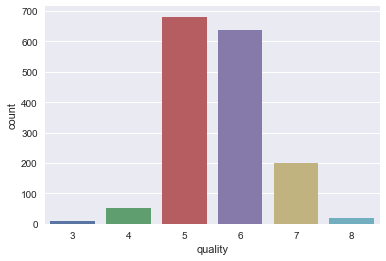

In [308]:
#Plot the target variablke to visualize the spread
sns.countplot(x='quality', data=wine_df_cleaned)

From the above plot we can see that how the data is spread across the target variable. Most of the data lies in the quality rating of 5&6 while the extremes 3,8 have very less observations

In [29]:
#Convert production date column to datetiem format
wine_df_cleaned['production date']=pd.to_datetime(wine_df_cleaned['production date'],infer_datetime_format=True)

In [30]:
#Getting the current date
current_date=datetime.now()

In [32]:
# Extracting a new feature age_of_wine by calculating the days from the production date and current date
deltas=[]
for i in range(len(wine_df_cleaned)):
    delta=current_date-wine_df_cleaned['production date'][i]
    deltas.append(delta.days)
wine_df_cleaned['age_of_wine']=deltas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000005FB6ABE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000005FE76DD8>]], dtype=object)

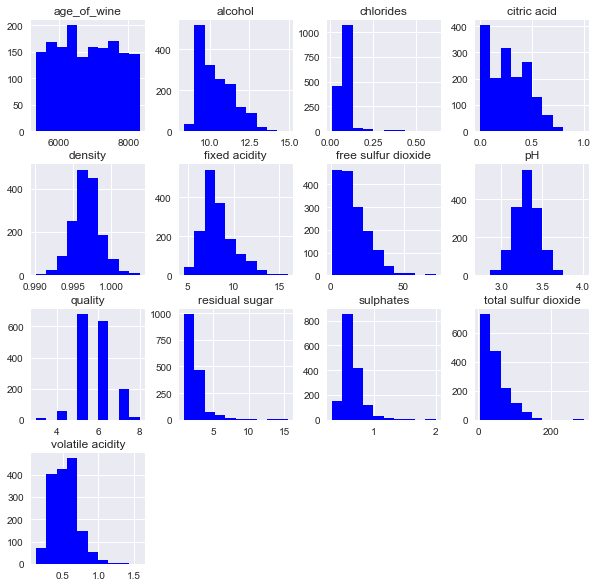

In [309]:
# Plot the dataset to see and understand the distribution of data
# From the below plot we can see that not all the fields are normally distributed and there are fields with positive skew
sns.set()
wine_df_cleaned.hist(figsize=(10,10), color='blue')

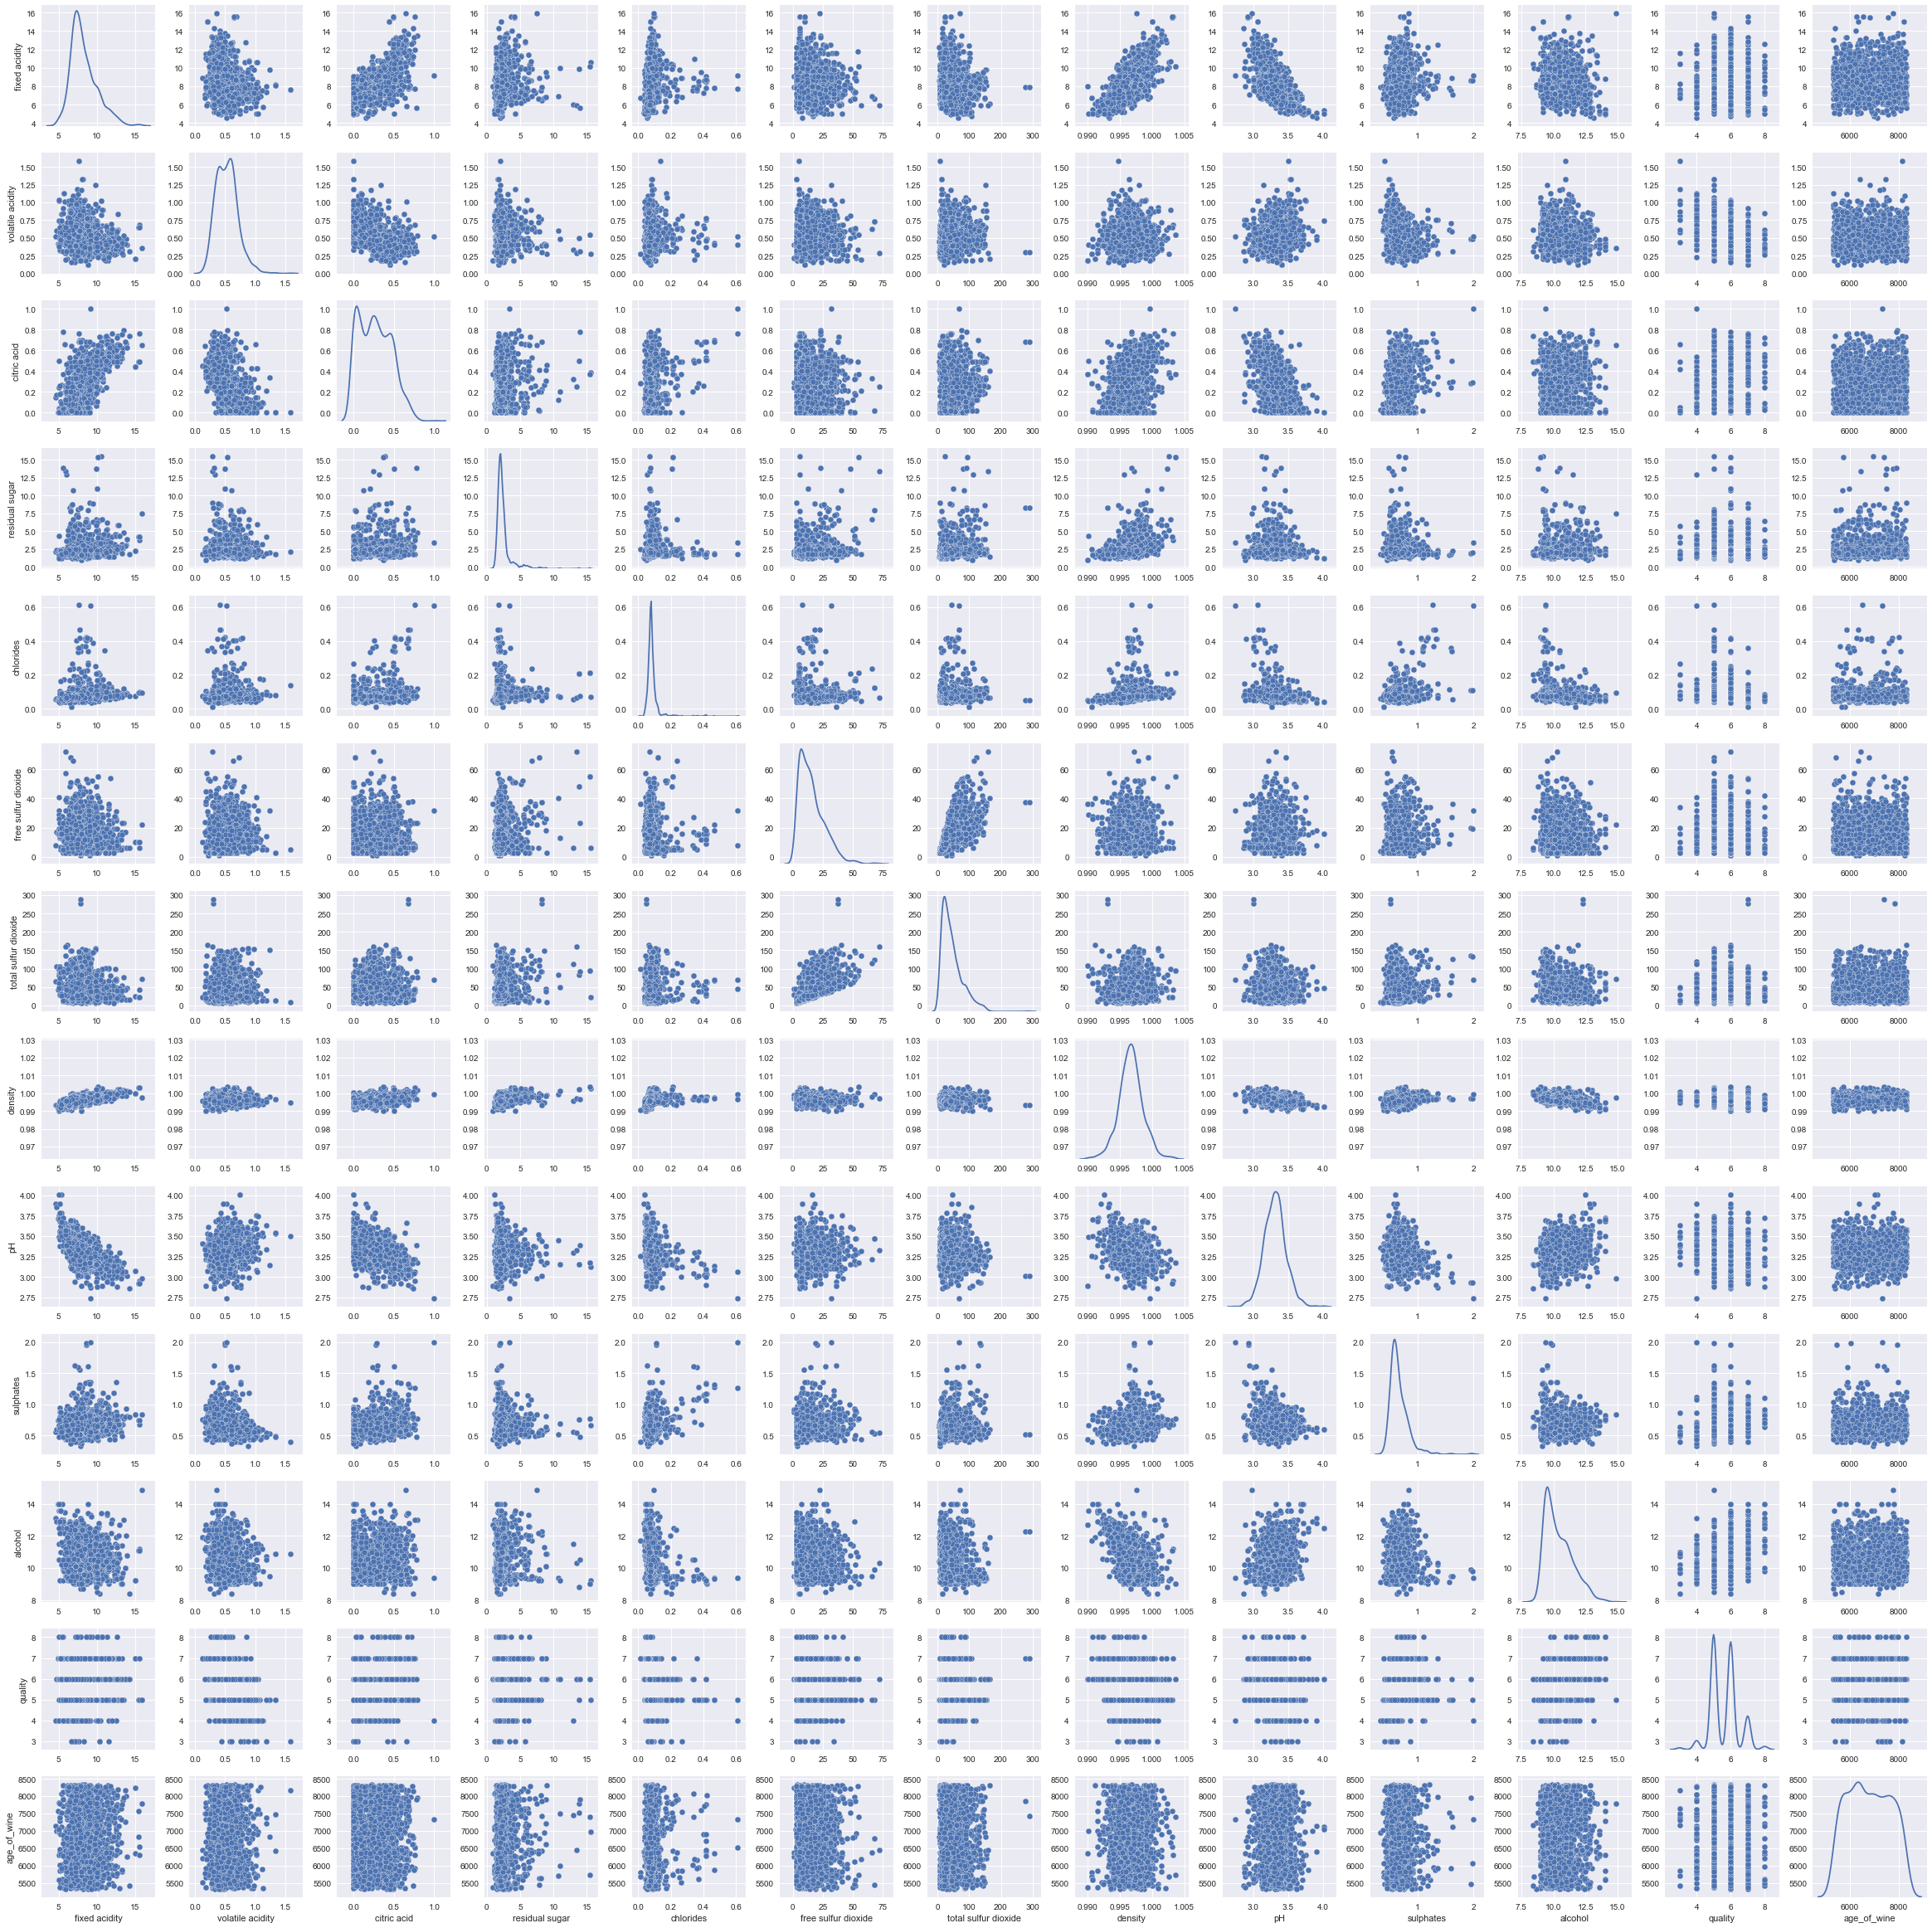

In [310]:
# Scatter plot to see the data distribution
# From the diagonal column we can understand the distribution of the data points even more clearly
sns.pairplot(wine_df_cleaned,diag_kind="kde")

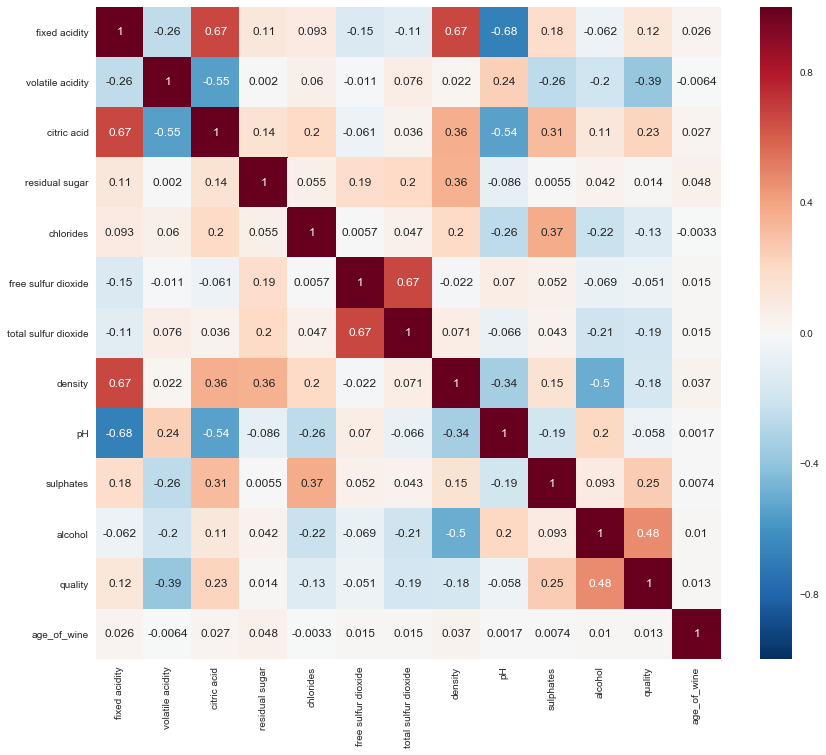

In [36]:
# Correlation between the fetaure set
# Correlation matrix helps us understand how the features are correlated with one anoter
# Positive value indicates that the features are positively correlated while the negative value indicates the inverse
correlation = wine_df_cleaned.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [314]:
# Correlation ranking of features w.r.t target variable
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476299
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
age_of_wine             0.012958
free sulfur dioxide    -0.050656
pH                     -0.058401
chlorides              -0.128645
density                -0.175067
total sulfur dioxide   -0.185100
volatile acidity       -0.390451
Name: quality, dtype: float64

From the above matrix we can see that features like 'fixed acidity','citric acid','residual sugar','alcohol','sulphates','age of wine' are positively correlated with the quality of the wine where as the others features have negative correlation.
Similary we can see how other features are correlated among one another.

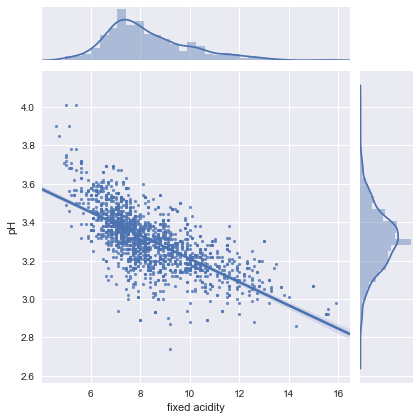

In [122]:
#Visualize the co-relation between pH and fixed Acidity
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = wine_df_cleaned[['pH', 'fixed acidity']]
#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

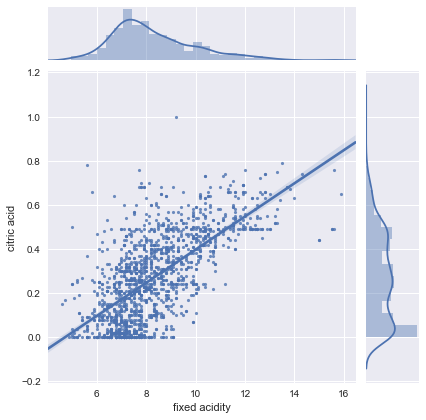

In [123]:
#Visualize the co-relation between citric acid and fixed Acidity
fixedAcidity_citricAcid = wine_df_cleaned[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

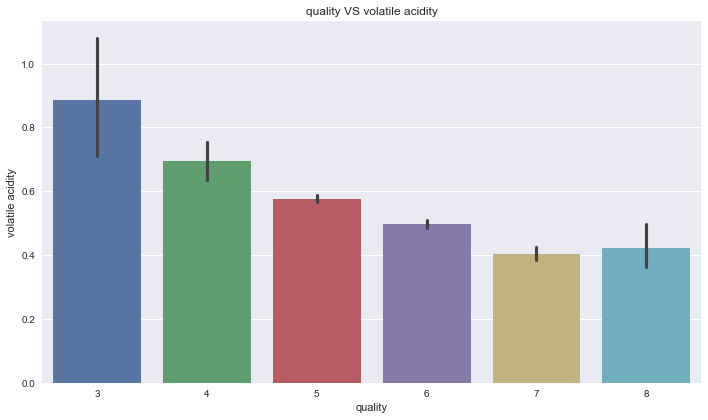

In [127]:
#Visualize the co-relation between Volatile acidity and quality
volatileAcidity_quality=wine_df_cleaned[['volatile acidity','quality']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')
plt.tight_layout()
plt.show()
plt.gcf().clear()

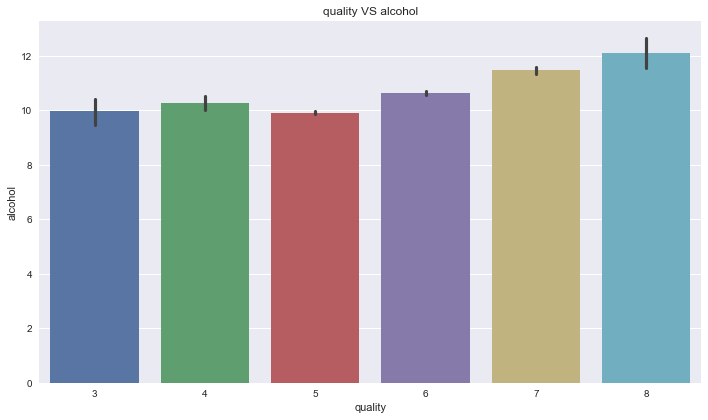

In [128]:
#Visualize the co-relation between Volatile acidity and quality
quality_alcohol=wine_df_cleaned[['alcohol','quality']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()
plt.gcf().clear()

# Outlier Analysis

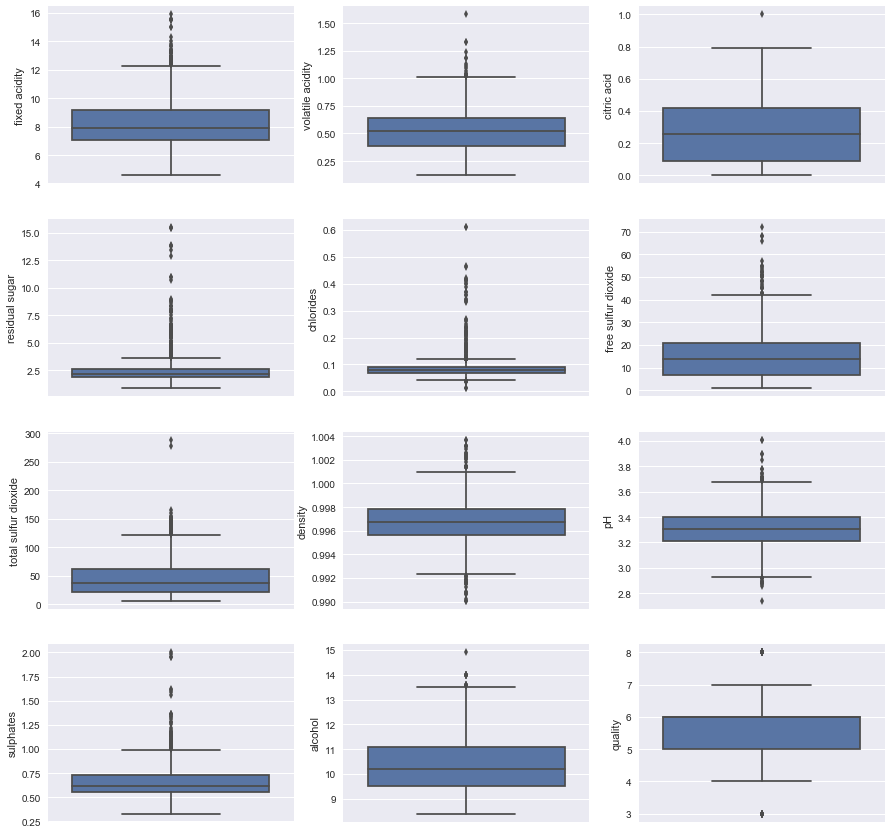

In [311]:
# Boxplot the data to see the outliers
fig, axs = plt.subplots(figsize=(15,15),nrows=4,ncols=3)
sns.boxplot(x=wine_df_cleaned.iloc[:,1],ax=axs[0][0],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,2],ax=axs[0][1],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,3],ax=axs[0][2],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,4],ax=axs[1][0],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,5],ax=axs[1][1],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,6],ax=axs[1][2],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,7],ax=axs[2][0],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,8],ax=axs[2][1],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,9],ax=axs[2][2],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,10],ax=axs[3][0],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,11],ax=axs[3][1],orient='v')
sns.boxplot(x=wine_df_cleaned.iloc[:,12],ax=axs[3][2],orient='v')

From the above plot we can see that almost all the fields have quite a number of outliers. Esp., 'residual sugar', 'chlorides', 'fixed acidity' have high number of outliers which might affect the classification accuracy.
There for it is better to remove the outliers and have cleaner data to have a better classification model.

In [191]:
# Use the 1.5* IQR technique to remove all the outlier points from the data set
wine_df_cleaned_p=wine_df_cleaned.iloc[:,1:13]
# For each feature find the data points with extreme high or low values
for feature in wine_df_cleaned_p.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(wine_df_cleaned_p[feature], q=25)
 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(wine_df_cleaned_p[feature], q=75)
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
 
    # Display the outliers
    print("Num of outliers for the feature '{}':".format(feature))
    display(len(wine_df_cleaned_p[~((wine_df_cleaned_p[feature] >= Q1 - step) & (wine_df_cleaned_p[feature] <= Q3 + step))]))
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(wine_df_cleaned_p[~((wine_df_cleaned_p[feature] >= Q1 - step) & (wine_df_cleaned_p[feature] <= Q3 + step))])
    wine_df_cleaned_p=wine_df_cleaned_p[((wine_df_cleaned_p[feature] >= Q1 - step) & (wine_df_cleaned_p[feature] <= Q3 + step))]

Num of outliers for the feature 'fixed acidity':


49

Data points considered outliers for the feature 'fixed acidity':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8             0.300         0.74             2.6      0.095   
206            12.8             0.300         0.74             2.6      0.095   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
264            12.5             0.560         0.49             2.4      0.064   
294            13.3             0.340         0.52             3.2      0.094   
328            13.4             0.270         0.62             2.6      0.082   
338            12.4             0.490         0.58             3.0      0.103   
339            12.5             0.280         0.54             2.3      0.082   
347            13.8             0.490         0.67             3.0      0.093   
353            13.5             0.530         0.79             4.8      0.120   
359            12.6             0.380         0.66             2.6      0.088   
363            12.5             0.460         0.63             2.0      0.071   
364            12.8             0.615         0.66             5.8      0.083   
366            12.8             0.615         0.66             5.8      0.083   
374            14.0             0.410         0.63             3.8      0.089   
381            13.7             0.415         0.68             2.9      0.085   
391            13.7             0.415         0.68             2.9      0.085   
394            12.7             0.600         0.65             2.3      0.063   
409            12.5             0.460         0.49             4.5      0.070   
429            12.8             0.840         0.63             2.4      0.088   
440            12.6             0.310         0.72             2.2      0.072   
442            15.6             0.685         0.76             3.7      0.100   
446            12.5             0.380         0.60             2.6      0.081   
470            13.0             0.320         0.65             2.6      0.093   
472            12.5             0.370         0.55             2.6      0.083   
509            13.3             0.290         0.75             2.8      0.084   
510            12.4             0.420         0.49             4.6      0.073   
516            12.5             0.600         0.49             4.3      0.100   
538            12.9             0.350         0.49             5.8      0.066   
544            14.3             0.310         0.74             1.8      0.075   
548            12.4             0.350         0.49             2.6      0.079   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4.2      0.095   
557            15.6             0.645         0.49             4.2      0.095   
559            13.0             0.470         0.49             4.3      0.085   
560            12.7             0.600         0.49             2.8      0.075   
564            13.0             0.470         0.49             4.3      0.085   
565            12.7             0.600         0.49             2.8      0.075   
596            12.4             0.400         0.51             2.0      0.059   
599            12.7             0.590         0.45             2.3      0.082   
601            13.2             0.460         0.52             2.2      0.071   
603            13.2             0.460         0.52             2.2      0.071   
611            13.2             0.380         0.55             2.7      0.081   
652            15.9             0.360         0.65             7.5      0.096   
680            13.3             0.430         0.58             1.9      0.070   
811            12.9             0.500         0.55             2.8      0.072   
814            12.6             0.410         0.54             2.8      0.103   
1224           12.6             0.390

Num of outliers for the feature 'volatile acidity':


20

Data points considered outliers for the feature 'volatile acidity':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
38              5.7             1.130         0.09            1.50      0.172   
94              5.0             1.020         0.04            1.40      0.045   
120             7.3             1.070         0.09            1.70      0.178   
126             8.2             1.330         0.00            1.70      0.081   
127             8.1             1.330         0.00            1.80      0.082   
134             7.9             1.040         0.05            2.20      0.084   
199             6.9             1.090         0.06            2.10      0.061   
553             5.0             1.040         0.24            1.60      0.050   
672             9.8             1.240         0.34            2.00      0.079   
690             7.4             1.185         0.00            4.25      0.097   
700            10.6             1.020         0.43            2.90      0.076   
705             8.4             1.035         0.15            6.00      0.073   
710            10.6             1.025         0.43            2.80      0.080   
724             7.5             1.115         0.10            3.10      0.086   
861             5.8             1.010         0.66            2.00      0.039   
899             8.3             1.020         0.02            3.40      0.084   
1261            6.3             1.020         0.00            2.00      0.083   
1299            7.6             1.580         0.00            2.10      0.137   
1312            8.0             1.180         0.21            1.90      0.083   
1467            6.7             1.040         0.08            2.30      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
38                    7.0                  19.0  0.99400  3.50       0.48   
94                   41.0                  85.0  0.99380  3.75       0.48   
120                  10.0                  89.0  0.99620  3.30       0.57   
126                   3.0                  12.0  0.99640  3.53       0.49   
127                   3.0                  12.0  0.99640  3.54       0.48   
134                  13.0                  29.0  0.99590  3.22       0.55   
199                  12.0                  31.0  0.99480  3.51       0.43   
553                  32.0                  96.0  0.99340  3.74       0.62   
672                  32.0                 151.0  0.99800  3.15       0.53   
690                   5.0                  14.0  0.99660  3.63       0.54   
700                  26.0                  88.0  0.99840  3.08       0.57   
705                  11.0                  54.0  0.99900  3.37       0.49   
710                  21.0                  84.0  0.99850  3.06       0.57   
724                   5.0                  12.0  0.99580  3.54       0.60   
861                  15.0                  88.0  0.99357  3.66       0.60   
899                   6.0                  11.0  0.99892  3.48       0.49   
1261                 17.0                  24.0  0.99437  3.59       0.55   
1299                  5.0                   9.0  0.99476  3.50       0.40   
1312                 14.0                  41.0  0.99532  3.34       0.47   
1467                 19.0                  32.0  0.99648  3.52       0.57   

      alcohol  quality  
38        9.8        4  
94       10.5        4  
120       9.0        5  
126      10.9        5  
127      10.9        5  
134       9.9        6  
199      11.4        4  
553      11.5        5  
672       9.5        5  
690      10.7        3  
700      10.1        6  
705       9.9        5  
710      10.1        5  
724      11.2        4  
861      11.5        6  
899      11.0        3  
1261     11.2        4  
1299     10.9        3  
1312     10.5        5  
1467     11.0        4

Num of outliers for the feature 'citric acid':


1

Data points considered outliers for the feature 'citric acid':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
151            9.2              0.52          1.0             3.4       0.61   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
151                 32.0                  69.0   0.9996  2.74        2.0   

     alcohol  quality  
151      9.4        4

Num of outliers for the feature 'residual sugar':


138

Data points considered outliers for the feature 'residual sugar':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36            6.10      0.071   
11              7.5             0.500         0.36            6.10      0.071   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
18              7.4             0.590         0.08            4.40      0.086   
33              6.9             0.605         0.12           10.70      0.073   
35              7.8             0.645         0.00            5.50      0.086   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
55              7.7             0.620         0.04            3.80      0.084   
57              7.5             0.630         0.12            5.10      0.111   
64              7.2             0.725         0.05            4.65      0.086   
65              7.2             0.725         0.05            4.65      0.086   
154             7.1             0.430         0.42            5.50      0.070   
155             7.1             0.430         0.42            5.50      0.071   
156             7.1             0.430         0.42            5.50      0.070   
157             7.1             0.430         0.42            5.50      0.071   
163             7.4             0.600         0.26            7.30      0.070   
164             7.3             0.590         0.26            7.20      0.070   
192             6.8             0.630         0.12            3.80      0.099   
215             7.0             0.490         0.49            5.60      0.060   
269            11.5             0.180         0.51            4.00      0.104   
270             7.9             0.545         0.06            4.00      0.087   
271            11.5             0.180         0.51            4.00      0.104   
272            10.9             0.370         0.58            4.00      0.071   
274             7.5             0.650         0.18            7.00      0.088   
275             7.9             0.545         0.06            4.00      0.087   
277            11.5             0.180         0.51            4.00      0.104   
278            10.3             0.320         0.45            6.40      0.073   
279             8.9             0.400         0.32            5.60      0.087   
...             ...               ...          ...             ...        ...   
1289            7.0             0.600         0.30            4.50      0.068   
1295            6.6             0.630         0.00            4.30      0.093   
1296            6.6             0.630         0.00            4.30      0.093   
1307            6.8             0.680         0.09            3.90      0.068   
1331            7.8             0.870         0.26            3.80      0.107   
1358            7.4             0.640         0.17            5.40      0.168   
1373            7.7             0.750         0.27            3.80      0.110   
1388            6.6             0.640         0.31            6.10      0.083   
1394            6.4             0.570         0.14            3.90      0.070   
1406            8.2             0.240         0.34            5.10      0.062   
1412            8.2             0.240         0.34            5.10      0.062   
1423            6.4             0.530         0.09            3.90      0.123   
1434           10.2             0.540         0.37           15.40      0.214   
1435           10.2             0.540         0.37           15.40      0.214   
1437            6.8             0.915         0.29            4.80      0.070   
1441            7.4             0.785         0.19            5.20      0.094   
1445            7.4             0.785         0.19            5.20      0.094   
1471            6.7             0.700

Num of outliers for the feature 'chlorides':


102

Data points considered outliers for the feature 'chlorides':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
17              8.1             0.520         0.28            1.70      0.368   
19              7.9             0.320         0.51            1.80      0.341   
42              7.5             0.490         0.20            2.60      0.332   
81              7.8             0.430         0.70            1.90      0.464   
83              7.3             0.670         0.26            1.80      0.401   
106             7.8             0.410         0.68            1.70      0.467   
109             8.1             0.785         0.52            2.00      0.122   
118             8.8             0.550         0.04            2.20      0.119   
121             8.8             0.550         0.04            2.20      0.119   
125             9.0             0.620         0.04            1.90      0.146   
130             8.0             0.745         0.56            2.00      0.118   
147             7.6             0.490         0.26            1.60      0.236   
169             7.5             0.705         0.24            1.80      0.360   
181             8.9             0.610         0.49            2.00      0.270   
210             9.7             0.530         0.60            2.00      0.039   
226             8.9             0.590         0.50            2.00      0.337   
240             8.9             0.635         0.37            1.70      0.263   
258             7.7             0.410         0.76            1.80      0.611   
281             7.7             0.270         0.68            3.50      0.358   
291            11.0             0.200         0.48            2.00      0.343   
303             7.4             0.670         0.12            1.60      0.186   
307            10.3             0.410         0.42            2.40      0.213   
308            10.3             0.430         0.44            2.40      0.214   
326            11.6             0.530         0.66            3.65      0.121   
330            10.2             0.360         0.64            2.90      0.122   
331            10.2             0.360         0.64            2.90      0.122   
335            11.9             0.695         0.53            3.40      0.128   
342            10.9             0.390         0.47            1.80      0.118   
343            10.9             0.390         0.47            1.80      0.118   
368            10.3             0.340         0.52            2.80      0.159   
...             ...               ...          ...             ...        ...   
1051            8.5             0.460         0.59            1.40      0.414   
1098            8.0             0.310         0.45            2.10      0.216   
1109           10.8             0.470         0.43            2.10      0.171   
1146            7.8             0.500         0.12            1.80      0.178   
1152            8.3             0.600         0.25            2.20      0.118   
1155            8.3             0.600         0.25            2.20      0.118   
1165            8.5             0.440         0.50            1.90      0.369   
1178            5.6             0.915         0.00            2.10      0.041   
1191            6.5             0.885         0.00            2.30      0.166   
1193            6.4             0.885         0.00            2.30      0.166   
1207            9.9             0.720         0.55            1.70      0.136   
1220           10.9             0.320         0.52            1.80      0.132   
1221           10.9             0.320         0.52            1.80      0.132   
1252            7.1             0.720         0.00            1.80      0.123   
1258            6.8             0.640         0.00            2.70      0.123   
1259            6.8             0.640         0.00            2.70      0.123   
1260            8.6             0.635         0.68            1.80      0.403   
1316            5.4             0.740

Num of outliers for the feature 'free sulfur dioxide':


25

Data points considered outliers for the feature 'free sulfur dioxide':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
90              7.9             0.520         0.26            1.90      0.079   
497             7.2             0.340         0.32            2.50      0.090   
522             8.2             0.390         0.49            2.30      0.099   
562             9.0             0.540         0.49            2.90      0.094   
584            11.8             0.330         0.49            3.40      0.093   
634             7.9             0.350         0.21            1.90      0.073   
678             8.3             0.780         0.10            2.60      0.081   
853             9.3             0.360         0.39            1.50      0.080   
854             9.3             0.360         0.39            1.50      0.080   
856             9.3             0.360         0.39            1.50      0.080   
925             8.6             0.220         0.36            1.90      0.064   
926             9.4             0.240         0.33            2.30      0.061   
982             7.3             0.520         0.32            2.10      0.070   
1028            7.2             0.340         0.21            2.50      0.075   
1075            9.1             0.250         0.34            2.00      0.071   
1090           10.0             0.260         0.54            1.90      0.083   
1131            5.9             0.190         0.21            1.70      0.045   
1154            6.6             0.580         0.00            2.20      0.100   
1156            8.5             0.180         0.51            1.75      0.071   
1175            6.5             0.610         0.00            2.20      0.095   
1182           10.2             0.400         0.40            2.50      0.068   
1217            8.2             0.340         0.37            1.90      0.057   
1231            7.8             0.815         0.01            2.60      0.074   
1256            7.5             0.590         0.22            1.80      0.082   
1529            7.1             0.690         0.08            2.10      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
90                   42.0                 140.0  0.99640  3.23       0.54   
497                  43.0                 113.0  0.99660  3.32       0.79   
522                  47.0                 133.0  0.99790  3.38       0.99   
562                  41.0                 110.0  0.99820  3.08       0.61   
584                  54.0                  80.0  1.00020  3.30       0.76   
634                  46.0                 102.0  0.99640  3.27       0.58   
678                  45.0                  87.0  0.99830  3.48       0.53   
853                  41.0                  55.0  0.99652  3.47       0.73   
854                  41.0                  55.0  0.99652  3.47       0.73   
856                  41.0                  55.0  0.99652  3.47       0.73   
925                  53.0                  77.0  0.99604  3.47       0.87   
926                  52.0                  73.0  0.99786  3.47       0.90   
982                  51.0                  70.0  0.99418  3.34       0.82   
1028                 41.0                  68.0  0.99586  3.37       0.54   
1075                 45.0                  67.0  0.99769  3.44       0.86   
1090                 42.0                  74.0  0.99451  2.98       0.63   
1131                 57.0                 135.0  0.99341  3.32       0.44   
1154                 50.0                  63.0  0.99544  3.59       0.68   
1156                 45.0                  88.0  0.99524  3.33       0.76   
1175                 48.0                  59.0  0.99541  3.61       0.70   
1182                 41.0                  54.0  0.99754  3.38       0.86   
1217                 43.0                  74.0  0.99408  3.23       0.81   
1231                 48.0                  90.0  0.99621  3.38       0.62   
1256                 43.0                  60.0  0.

Num of outliers for the feature 'total sulfur dioxide':


51

Data points considered outliers for the feature 'total sulfur dioxide':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
46              7.7             0.935         0.43             2.2      0.114   
53              8.6             0.380         0.36             3.0      0.081   
79              8.3             0.625         0.20             1.5      0.080   
86              8.6             0.490         0.28             1.9      0.110   
88              9.3             0.390         0.44             2.1      0.107   
91              8.6             0.490         0.28             1.9      0.110   
92              8.6             0.490         0.29             2.0      0.110   
145             8.1             0.670         0.55             1.8      0.117   
188             7.9             0.500         0.33             2.0      0.084   
189             7.9             0.490         0.32             1.9      0.082   
190             8.2             0.500         0.35             2.9      0.077   
195             7.8             0.590         0.33             2.0      0.074   
201             8.8             0.370         0.48             2.1      0.097   
207             7.8             0.570         0.31             1.8      0.069   
219             7.8             0.530         0.33             2.4      0.080   
255             8.0             0.570         0.23             3.2      0.073   
313             8.6             0.470         0.30             3.0      0.076   
332             8.0             0.580         0.28             3.2      0.066   
354             6.1             0.210         0.40             1.4      0.066   
414             8.8             0.520         0.34             2.7      0.087   
417             7.0             0.580         0.12             1.9      0.091   
463             8.1             0.660         0.70             2.2      0.098   
523             9.3             0.400         0.49             2.5      0.085   
524             9.2             0.430         0.49             2.4      0.086   
561             9.0             0.440         0.49             2.4      0.078   
591             6.6             0.390         0.49             1.7      0.070   
636             9.6             0.880         0.28             2.4      0.086   
637             9.5             0.885         0.27             2.3      0.084   
651             9.8             0.880         0.25             2.5      0.104   
684             9.8             0.980         0.32             2.3      0.078   
693             9.0             0.480         0.32             2.8      0.084   
694             9.0             0.470         0.31             2.7      0.084   
723             7.1             0.310         0.30             2.2      0.053   
741             9.2             0.530         0.24             2.6      0.078   
771             9.4             0.685         0.26             2.4      0.082   
772             9.5             0.570         0.27             2.3      0.082   
789             8.6             0.630         0.17             2.9      0.099   
791             8.8             0.640         0.17             2.9      0.084   
852             8.0             0.420         0.32             2.5      0.080   
905             9.2             0.580         0.20             3.0      0.081   
977             8.4             0.590         0.29             2.6      0.109   
1184            6.7             0.640         0.23             2.1      0.080   
1188            6.7             0.640         0.23             2.1      0.080   
1400            7.9             0.690         0.21             2.1      0.080   
1401            7.9             0.690         0.21             2.1      0.080   
1419            7.7             0.640         0.21             2.2      0.077   
1493            7.7             0.540         0.26             1.9      0.089   
1496            7.7             0.540         0.26             1.9      0.089   
1559            7.8             0.600

Num of outliers for the feature 'density':


27

Data points considered outliers for the feature 'density':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2             0.340         0.00            1.80      0.079   
144             5.2             0.340         0.00            1.80      0.050   
198             5.4             0.835         0.08            1.20      0.046   
289            11.6             0.420         0.53            3.30      0.105   
344            11.9             0.570         0.50            2.60      0.082   
390             5.6             0.850         0.05            1.40      0.045   
459            11.6             0.580         0.66            2.20      0.074   
465            10.0             0.290         0.40            2.90      0.098   
588             5.0             0.420         0.24            2.00      0.060   
633            10.1             0.935         0.22            3.40      0.105   
821             4.9             0.420         0.00            2.10      0.048   
999             6.4             0.690         0.00            1.65      0.055   
1017            8.0             0.180         0.37            0.90      0.049   
1018            8.0             0.180         0.37            0.90      0.049   
1120            7.9             0.540         0.34            2.50      0.076   
1122            6.3             0.470         0.00            1.40      0.055   
1126            5.8             0.290         0.26            1.70      0.063   
1157            5.1             0.510         0.18            2.10      0.042   
1228            5.1             0.420         0.00            1.80      0.044   
1234            7.1             0.750         0.01            2.20      0.059   
1237            7.1             0.750         0.01            2.20      0.059   
1269            5.5             0.490         0.03            1.80      0.044   
1270            5.0             0.380         0.01            1.60      0.048   
1298            5.7             0.600         0.00            1.40      0.063   
1456            6.0             0.540         0.06            1.80      0.050   
1475            5.3             0.470         0.11            2.20      0.048   
1477            5.3             0.470         0.11            2.20      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
142                  27.0                  63.0  0.99160  3.68       0.79   
144                  27.0                  63.0  0.99160  3.68       0.79   
198                  13.0                  93.0  0.99240  3.57       0.85   
289                  33.0                  98.0  1.00100  3.20       0.95   
344                   6.0                  32.0  1.00060  3.12       0.78   
390                  12.0                  88.0  0.99240  3.56       0.82   
459                  10.0                  47.0  1.00080  3.25       0.57   
465                  10.0                  26.0  1.00060  3.48       0.91   
588                  19.0                  50.0  0.99170  3.72       0.74   
633                  11.0                  86.0  1.00100  3.43       0.64   
821                  16.0                  42.0  0.99154  3.71       0.74   
999                   7.0                  12.0  0.99162  3.47       0.53   
1017                 36.0                 109.0  0.99007  2.89       0.44   
1018                 36.0                 109.0  0.99007  2.89       0.44   
1120                  8.0                  17.0  0.99235  3.20       0.72   
1122                 27.0                  33.0  0.99220  3.45       0.48   
1126                  3.0                  11.0  0.99150  3.39       0.54   
1157                 16.0                 101.0  0.99240  3.46       0.87   
1228                 18.0                  88.0  0.99157  3.68       0.73   
1234                 11.0                  18.0  0.99242  3.39       0.40   
1237                 11.0                  18.0  0.99242  3.39       0.40   
1269                 28.0                  

Num of outliers for the feature 'pH':


20

Data points considered outliers for the feature 'pH':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
45              4.6             0.520         0.15            2.10      0.054   
95              4.7             0.600         0.17            2.30      0.058   
268             6.9             0.540         0.04            3.00      0.077   
276             6.9             0.540         0.04            3.00      0.077   
650            10.7             0.430         0.39            2.20      0.106   
656            10.7             0.430         0.39            2.20      0.106   
657            12.0             0.500         0.59            1.40      0.073   
667            11.3             0.340         0.45            2.00      0.082   
669            11.3             0.340         0.45            2.00      0.082   
930             6.6             0.610         0.01            1.90      0.080   
934             6.6             0.610         0.01            1.90      0.080   
996             5.6             0.660         0.00            2.20      0.087   
997             5.6             0.660         0.00            2.20      0.087   
1111            5.4             0.420         0.27            2.00      0.092   
1166            9.9             0.540         0.26            2.00      0.111   
1300            5.2             0.645         0.00            2.15      0.080   
1377            5.2             0.490         0.26            2.30      0.090   
1470           10.0             0.690         0.11            1.40      0.084   
1488            5.6             0.540         0.04            1.70      0.049   
1491            5.6             0.540         0.04            1.70      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
45                    8.0                  65.0  0.99340  3.90       0.56   
95                   17.0                 106.0  0.99320  3.85       0.60   
268                   7.0                  27.0  0.99870  3.69       0.91   
276                   7.0                  27.0  0.99870  3.69       0.91   
650                   8.0                  32.0  0.99860  2.89       0.50   
656                   8.0                  32.0  0.99860  2.89       0.50   
657                  23.0                  42.0  0.99800  2.92       0.68   
667                   6.0                  15.0  0.99880  2.94       0.66   
669                   6.0                  15.0  0.99880  2.94       0.66   
930                   8.0                  25.0  0.99746  3.69       0.73   
934                   8.0                  25.0  0.99746  3.69       0.73   
996                   3.0                  11.0  0.99378  3.71       0.63   
997                   3.0                  11.0  0.99378  3.71       0.63   
1111                 23.0                  55.0  0.99471  3.78       0.64   
1166                  7.0                  60.0  0.99709  2.94       0.98   
1300                 15.0                  28.0  0.99444  3.78       0.61   
1377                 23.0                  74.0  0.99530  3.71       0.62   
1470                  8.0                  24.0  0.99578  2.88       0.47   
1488                  5.0                  13.0  0.99420  3.72       0.58   
1491                  5.0                  13.0  0.99420  3.72       0.58   

      alcohol  quality  
45       13.1        4  
95       12.9        6  
268       9.4        6  
276       9.4        6  
650       9.6        5  
656       9.6        5  
657      10.5        7  
667       9.2        6  
669       9.2        6  
930      10.5        5  
934      10.5        5  
996      12.8        7  
997      12.8        7  
1111     12.3        7  
1166     10.2        5  
1300     12.5        6  
1377     12.2        6  
1470      9.7        5  
1488     11.4        5  
1491     11.4        5

Num of outliers for the feature 'sulphates':


26

Data points considered outliers for the feature 'sulphates':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
43              8.1             0.660         0.22             2.2      0.079   
69              8.0             0.705         0.05             1.9      0.074   
161             7.6             0.680         0.02             1.3      0.072   
197            11.5             0.300         0.60             2.0      0.067   
245             7.3             0.660         0.00             2.0      0.084   
249             7.3             0.660         0.00             2.0      0.084   
340            12.2             0.340         0.50             2.4      0.066   
350            10.7             0.670         0.22             2.7      0.107   
369             9.4             0.270         0.53             2.4      0.074   
372             9.1             0.280         0.48             1.8      0.067   
376            11.5             0.450         0.50             3.0      0.078   
377             9.4             0.270         0.53             2.4      0.074   
477            10.4             0.240         0.49             1.8      0.075   
503            10.5             0.260         0.47             1.9      0.078   
504            10.5             0.240         0.42             1.8      0.077   
506            10.4             0.240         0.46             1.8      0.075   
586            11.1             0.310         0.49             2.7      0.094   
623             7.9             0.510         0.25             2.9      0.077   
639             8.9             0.290         0.35             1.9      0.067   
1158            6.7             0.410         0.43             2.8      0.076   
1367            6.9             0.540         0.30             2.2      0.088   
1403            7.2             0.330         0.33             1.7      0.061   
1408            8.1             0.290         0.36             2.2      0.048   
1516            6.1             0.320         0.25             2.3      0.071   
1522            6.1             0.320         0.25             2.3      0.071   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
43                    9.0                  23.0  0.99680  3.30       1.20   
69                    8.0                  19.0  0.99620  3.34       0.95   
161                   9.0                  20.0  0.99650  3.17       1.08   
197                  12.0                  27.0  0.99810  3.11       0.97   
245                   6.0                  23.0  0.99830  3.61       0.96   
249                   6.0                  23.0  0.99830  3.61       0.96   
340                  10.0                  21.0  1.00000  3.12       1.18   
350                  17.0                  34.0  1.00040  3.28       0.98   
369                   6.0                  18.0  0.99620  3.20       1.13   
372                  26.0                  46.0  0.99670  3.32       1.04   
376                  19.0                  47.0  1.00030  3.26       1.11   
377                   6.0                  18.0  0.99620  3.20       1.13   
477                   6.0                  20.0  0.99770  3.18       1.06   
503                   6.0                  24.0  0.99760  3.18       1.04   
504                   6.0                  22.0  0.99760  3.21       1.05   
506                   6.0                  21.0  0.99760  3.25       1.02   
586                  16.0                  47.0  0.99860  3.12       1.02   
623                  21.0                  45.0  0.99740  3.49       0.96   
639                  25.0                  57.0  0.99700  3.18       1.36   
1158                 22.0                  54.0  0.99572  3.42       1.16   
1367                  9.0                 105.0  0.99725  3.25       1.18   
1403                  3.0                  13.0

Num of outliers for the feature 'alcohol':


5

Data points considered outliers for the feature 'alcohol':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
467             8.8              0.46         0.45             2.6      0.065   
491             9.2              0.41         0.50             2.5      0.055   
492             8.9              0.40         0.51             2.6      0.052   
1118            7.1              0.39         0.12             2.1      0.065   
1132            7.4              0.36         0.34             1.8      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
467                   7.0                  18.0  0.99470  3.32       0.79   
491                  12.0                  25.0  0.99520  3.34       0.79   
492                  13.0                  27.0  0.99500  3.32       0.90   
1118                 14.0                  24.0  0.99252  3.30       0.53   
1132                 18.0                  38.0  0.99330  3.38       0.88   

      alcohol  quality  
467      14.0        6  
491      13.3        7  
492      13.4        7  
1118     13.3        6  
1132     13.6        7

Num of outliers for the feature 'quality':


11

Data points considered outliers for the feature 'quality':


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267             7.9              0.35         0.46             3.6      0.078   
481             9.4              0.30         0.56             2.8      0.080   
495            10.7              0.35         0.53             2.6      0.070   
498            10.7              0.35         0.53             2.6      0.070   
828             7.8              0.57         0.09             2.3      0.065   
1061            9.1              0.40         0.50             1.8      0.071   
1202            8.6              0.42         0.39             1.8      0.068   
1449            7.2              0.38         0.31             2.0      0.056   
1469            7.3              0.98         0.05             2.1      0.061   
1505            6.7              0.76         0.02             1.8      0.078   
1549            7.4              0.36         0.30             1.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
267                  15.0                  37.0  0.99730  3.35       0.86   
481                   6.0                  17.0  0.99640  3.15       0.92   
495                   5.0                  16.0  0.99720  3.15       0.65   
498                   5.0                  16.0  0.99720  3.15       0.65   
828                  34.0                  45.0  0.99417  3.46       0.74   
1061                  7.0                  16.0  0.99462  3.21       0.69   
1202                  6.0                  12.0  0.99516  3.35       0.69   
1449                 15.0                  29.0  0.99472  3.23       0.76   
1469                 20.0                  49.0  0.99705  3.31       0.55   
1505                  6.0                  12.0  0.99600  3.55       0.63   
1549                 17.0                  24.0  0.99419  3.24       0.70   

      alcohol  quality  
267     12.80        8  
481     11.70        8  
495     11.00        8  
498     11.00        8  
828     12.70        8  
1061    12.50        8  
1202    11.70        8  
1449    11.30        8  
1469     9.70        3  
1505     9.95        3  
1549    11.40        8

   The above table gives the details about the outlier points and the number of outliers in all features. Correspondigly all the outliers are removed from the fetures in the above data set and the resultant outlier free data is stored in 'wine_df_cleaned_p' dataframe

In [312]:
# Processed dataset without outliers
wine_df_cleaned_p

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
10              6.7             0.580         0.08             1.8      0.097   
12              5.6             0.615         0.00             1.6      0.089   
16              8.5             0.280         0.56             1.8      0.092   
20              8.9             0.220         0.48             1.8      0.077   
21              7.6             0.390         0.31             2.3      0.082   
22              7.9             0.430         0.21             1.6      0.106   
23              8.5             0.490         0.11             2.3      0.084   
24              6.9             0.400         0.14             2.4      0.085   
25              6.3             0.390         0.16             1.4      0.080   
26              7.6             0.410         0.24             1.8      0.080   
27              7.9             0.430         0.21             1.6      0.106   
28              7.1             0.710         0.00             1.9      0.080   
29              7.8             0.645         0.00             2.0      0.082   
30              6.7             0.675         0.07             2.4      0.089   
31              6.9             0.685         0.00             2.5      0.105   
32              8.3             0.655         0.12             2.3      0.079   
34              5.2             0.320         0.25             1.8      0.103   
36              7.8             0.600         0.14             2.4      0.086   
37              8.1             0.380         0.28             2.1      0.066   
41              8.8             0.610         0.30             2.8      0.088   
44              6.8             0.670         0.02             1.8      0.050   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13             2.0      0.076   
1564            7.2             0.695         0.13             2.0      0.076   
1565            6.7             0.670         0.02             1.9      0.061   
1566            6.7             0.160         0.64             2.1      0.059   
1567            7.2             0.695         0.13             2.0      0.076   
1568            7.0             0.560         0.13             1.6      0.077   
1569            6.2             0.510         0.14             1.9      0.056   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390

The above dataset conatains 1124 rows. Meaning, 475 records were removed as part of outlier analysis

In [313]:
# Displaying the target variable split
wine_df_cleaned_p.quality.value_counts().sort_index()

4     32
5    490
6    472
7    130
Name: quality, dtype: int64

If we look carefully, the quality categories 3&8 are completey gone because it has only few data points (10 & 18) respectively and the system treated those as outlier points and removed them.

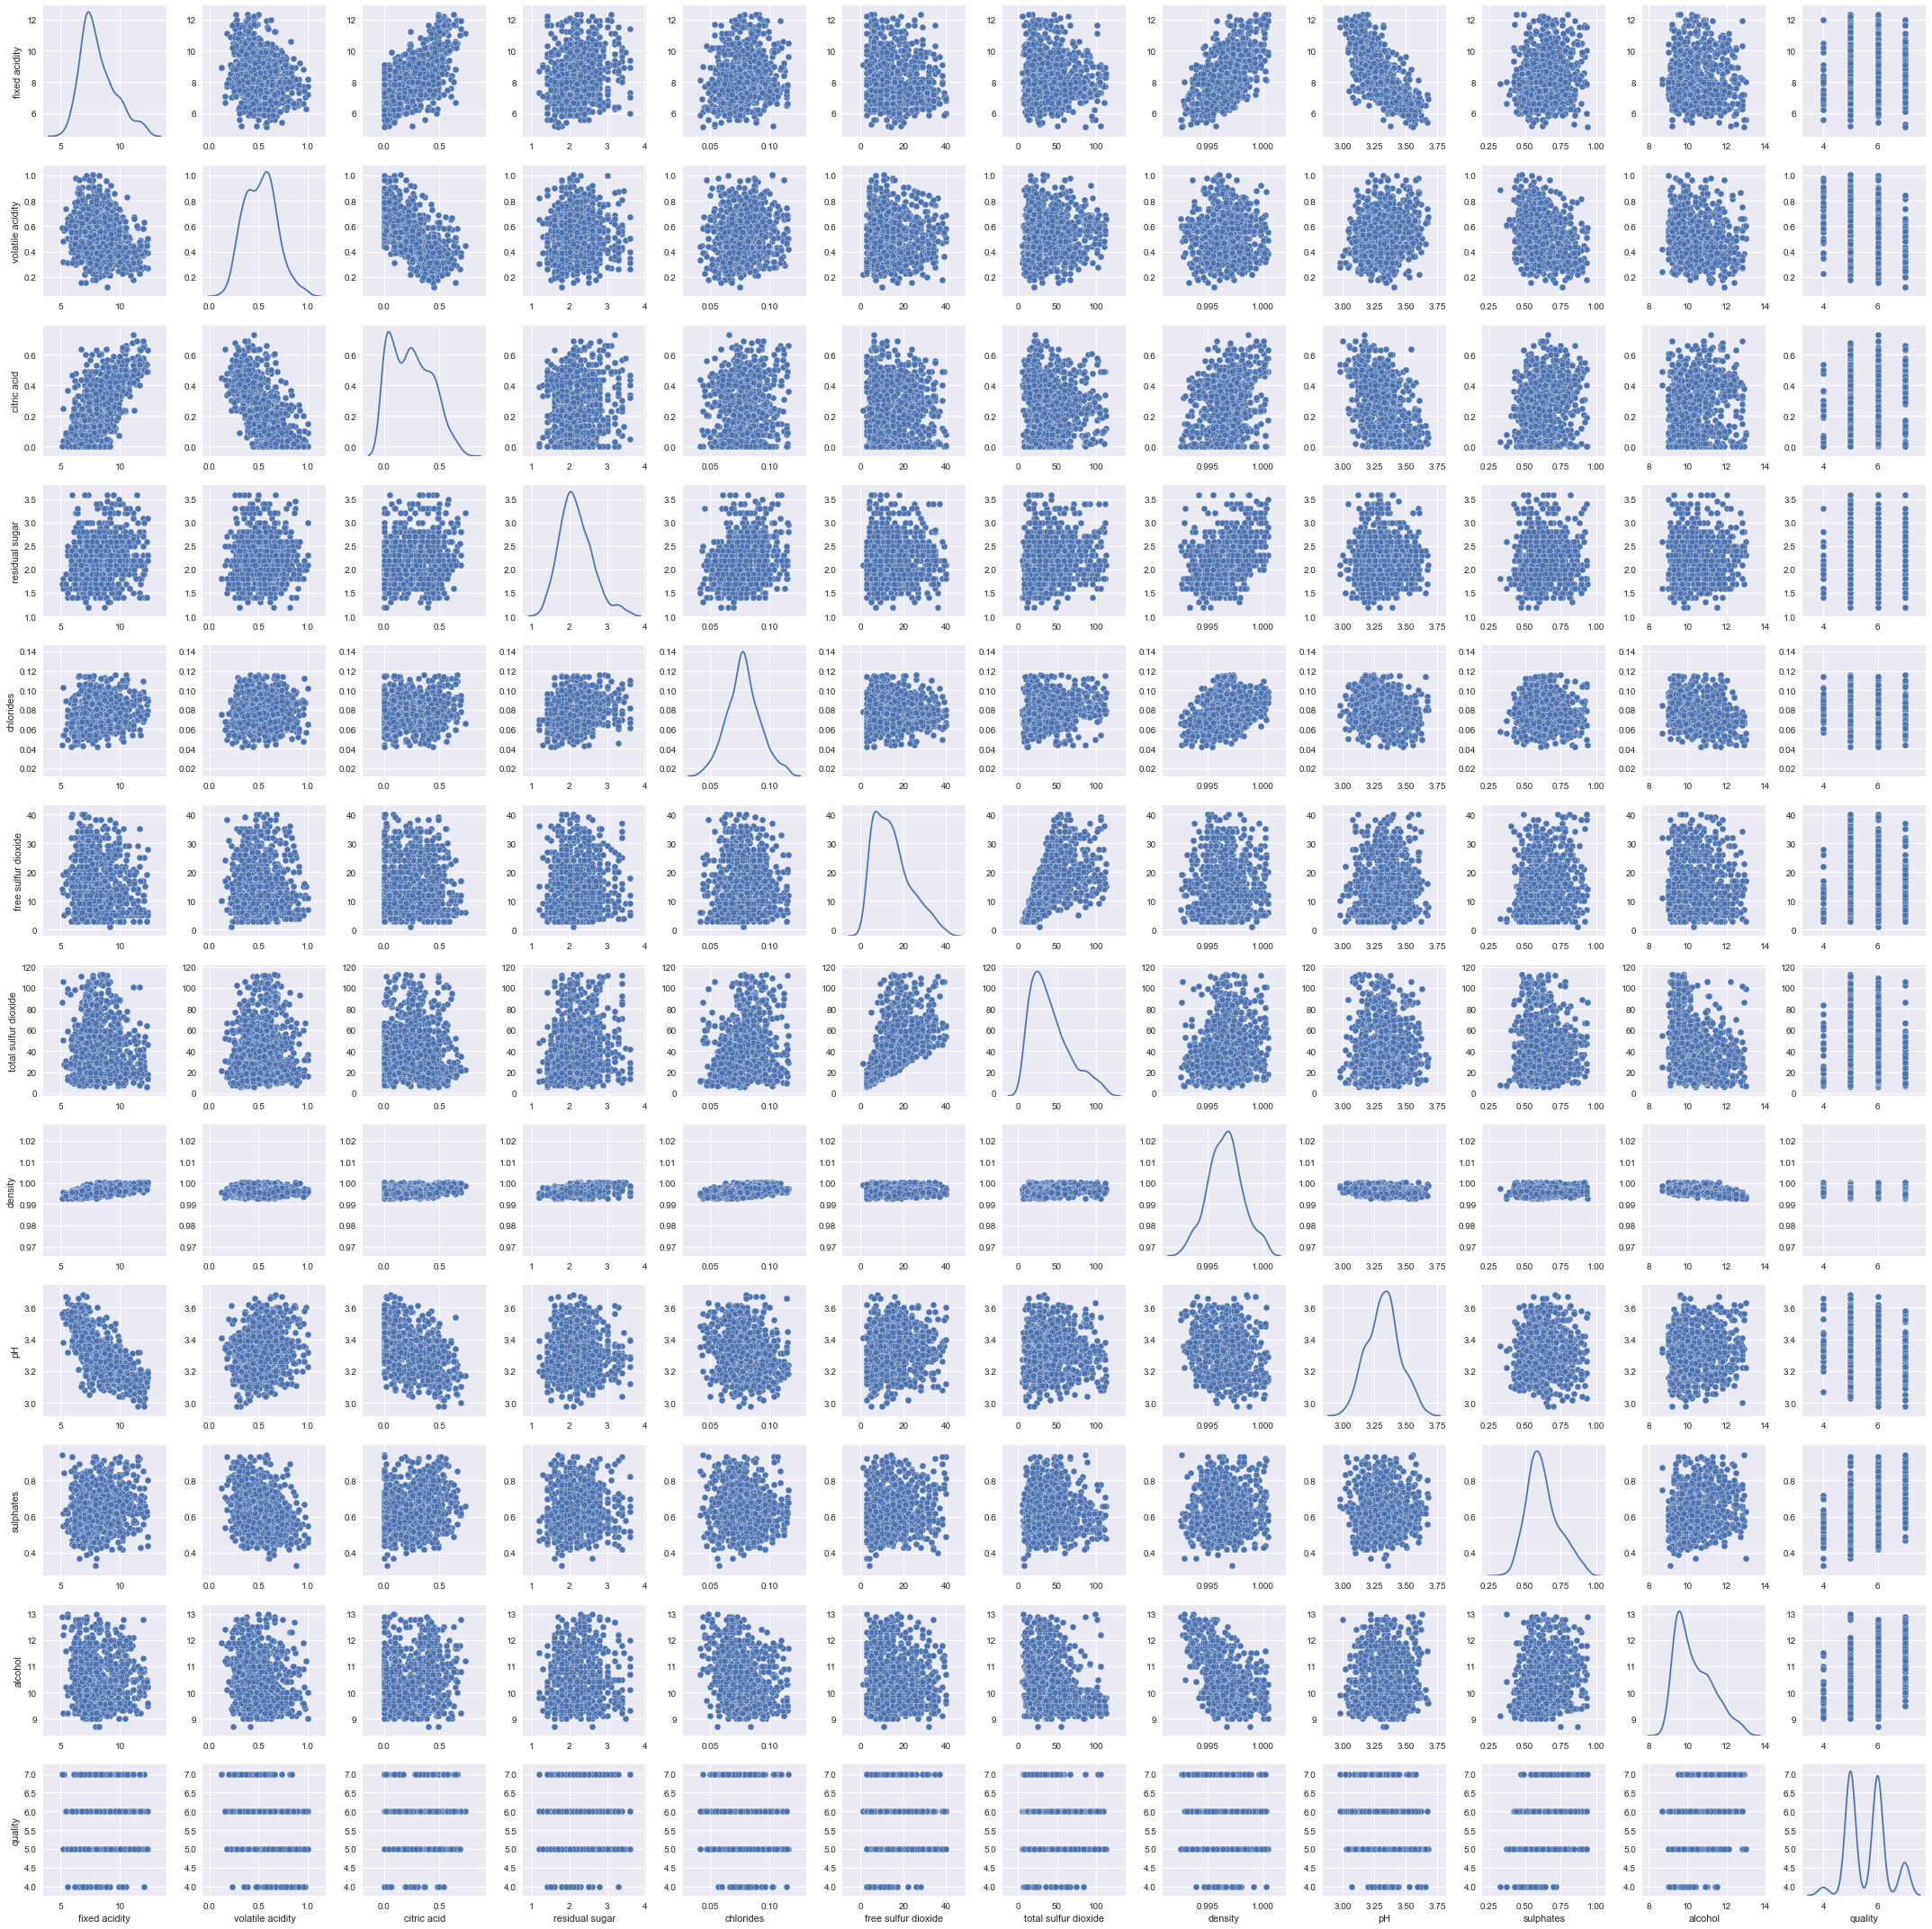

In [338]:
# Plot the dataset to see and understand the distribution of data
# From the below plot we can see that not all the fields are normally distributed and there are fields with positive skew
sns.set()
sns.pairplot(wine_df_cleaned_p,diag_kind='kde')

The above plot is the pairplot on dataset after outlier removal. Now if we see te diagonal elements, we can see that the distribution has become more normal than it was before removing the outliers. We will use this processed dataset to select features and build the model.

# Feature Selection and Model building

In [315]:
# Splitting the data into train and test data
Y_wine=wine_df_cleaned_p['quality']
X_wine=wine_df_cleaned_p.drop(['quality'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_wine, Y_wine,
     test_size=0.30, random_state=123)

In [316]:
# Normalizing the data
std_scale = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [317]:
# Building a basic Random forest Classifier using all the features in the dataset
RF_all=RandomForestClassifier(random_state=0)
RF_all.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [318]:
#Predicting the wine quality using the test data based on the model trained above  
y_predict=RF_all.predict(X_test)

In [343]:
# Performance metrics for the above model with all the features
RF_all_acc=accuracy_score(y_test,y_predict)
print('Accuracy is: ',RF_all_acc)
RF_all_cm = confusion_matrix(y_test,y_predict)
print(RF_all_cm)
RF_all_cr= classification_report(y_test,y_predict)
print(RF_all_cr)

Accuracy is:  0.647928994083
[[  0   9   1   0]
 [  0 120  36   1]
 [  1  38  85   3]
 [  0   1  29  14]]
             precision    recall  f1-score   support

          4       0.00      0.00      0.00        10
          5       0.71      0.76      0.74       157
          6       0.56      0.67      0.61       127
          7       0.78      0.32      0.45        44

avg / total       0.64      0.65      0.63       338



The above model trained with all the features gave us an classification accuracy of 64.79%. Now we will do feature selection to select only the important features and will try to classify based on that model

In [265]:
# The model trained above with all the fetures yielded an accuracy of 64.79 %

# Feature Selection based on RFE

In [344]:
# Trying to improve the model performance by doing fetaure selection
# Feature selection using RFE
RF_rfe = RFE(RF_all, 7)
RF_rfe_fit = RF_rfe.fit(X_train, y_train)
print("Num Features:",RF_rfe_fit.n_features_)
print("Selected Features: ",RF_rfe_fit.support_)
print("Feature Ranking: ",RF_rfe_fit.ranking_)

Num Features: 7
Selected Features:  [ True  True False False  True False  True  True False  True  True]
Feature Ranking:  [1 1 4 5 1 2 1 1 3 1 1]


In [345]:
# Rebuilding the model using only the fetaures identified using RFE
X_train_rfe=RF_rfe_fit.transform(X_train)
X_test_rfe=RF_rfe_fit.transform(X_test)
RF_rfe_selected=RandomForestClassifier(random_state=0)
RF_rfe_selected.fit(X_train_rfe,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [346]:
#Predicting the wine quality using the test data based on the model trained above  
y_predict_rfe=RF_rfe_selected.predict(X_test_rfe)

In [357]:
#Performance metrics for the above model with rfe selected the features
RF_rfe_acc=accuracy_score(y_test,y_predict_rfe)
print('Accuracy is: ',RF_rfe_acc)
RF_rfe_cm = confusion_matrix(y_test,y_predict_rfe)
print(RF_rfe_cm)
RF_rfe_cr= classification_report(y_test,y_predict_rfe)
print(RF_rfe_cr)

Accuracy is:  0.680473372781
[[  0   8   2   0]
 [  0 121  35   1]
 [  0  31  93   3]
 [  0   5  23  16]]
             precision    recall  f1-score   support

          4       0.00      0.00      0.00        10
          5       0.73      0.77      0.75       157
          6       0.61      0.73      0.66       127
          7       0.80      0.36      0.50        44

avg / total       0.67      0.68      0.66       338



C:\Users\ajayku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After doing feature selection and reducing the features to 7, we can see that the accuracy has increased to 68.04%. I have used RFE for feature selection with k value eqauls 7. I also tried RFECV but it yielded an accuracy of 64.4% and hence I decided to proceed with RFE for feature selection with K=7 which yiels the best accuracy

In [358]:
wine_df_cleaned_p.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [364]:
X_wine_fs=X_wine[['fixed acidity','volatile acidity','chlorides','total sulfur dioxide','density','sulphates','alcohol']]
Y_wine_fs=Y_wine
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_wine_fs, Y_wine_fs,
     test_size=0.30, random_state=123)
std_scale = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X_train_fs)
X_train_fs = std_scale.transform(X_train_fs)
X_test_fs = std_scale.transform(X_test_fs)

In [365]:
#Using SVM for classification
svm_clf = svm.SVC(C=1.0)
svm_clf.fit(X_train_fs, y_train_fs)
y_predict_svm=svm_clf.predict(X_test_fs)

In [366]:
svm_acc=accuracy_score(y_test_fs,y_predict_svm)
print('Accuracy is: ',svm_acc)
svm_cm = confusion_matrix(y_test_fs,y_predict_svm)
print(svm_cm)
svm_cr= classification_report(y_test_fs,y_predict_svm)
print(svm_cr)

Accuracy is:  0.573964497041
[[  0   9   1   0]
 [  0 116  41   0]
 [  0  49  78   0]
 [  0   2  42   0]]
             precision    recall  f1-score   support

          4       0.00      0.00      0.00        10
          5       0.66      0.74      0.70       157
          6       0.48      0.61      0.54       127
          7       0.00      0.00      0.00        44

avg / total       0.49      0.57      0.53       338



C:\Users\ajayku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [416]:
# Training a Logistic Regression Model
log_fs=linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg').fit(X_train_fs,y_train_fs)

In [420]:
# Predicting the test data
y_predict_log=log_fs.predict(X_test_fs)

In [421]:
# Performance Metrics
log_acc=accuracy_score(y_test_fs,y_predict_log)
print('Accuracy is: ',log_acc)
log_cm = confusion_matrix(y_test_fs,y_predict_log)
print(log_cm)
log_cr= classification_report(y_test_fs,y_predict_log)
print(log_cr)

Accuracy is:  0.576923076923
[[  0   9   1   0]
 [  0 108  49   0]
 [  0  47  78   2]
 [  0   2  33   9]]
             precision    recall  f1-score   support

          4       0.00      0.00      0.00        10
          5       0.65      0.69      0.67       157
          6       0.48      0.61      0.54       127
          7       0.82      0.20      0.33        44

avg / total       0.59      0.58      0.56       338



C:\Users\ajayku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


When we compare the performance of the above models it is clearly evident that RandomForest has performed better than Logistic Regression and SVM.

Ranking:
1. Random Forest
2. Logistic Regression
3. SVM

Eventhough the accuracy is imporved still it is under 70%. One reason might be beause of the data available . Not amany data is available for all the category as we saw above. Majority falls in the 5,6,7 range there by creating an imbalance. So, another approach is to group the data into three bins namely bad,average and best to classify the wines based on these categories.

I hvae grouped the  data accordingly:

Quality 1-4 : Bad
Quality 5-6 : Good
Quality 7-10 : Best

# Classfication after categorining into bins

In [465]:
#Defining the splits for categories. 1–4 will be bad quality, 5–6 will be average, 7–10 will be best
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
wine_df_cleaned_p['quality_category'] = pd.cut(wine_df_cleaned_p['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
display(wine_df_cleaned_p.head(n=2))
# Split the data into features and target label
Y_wine_qc = wine_df_cleaned_p['quality_category']
X_wine_qc = wine_df_cleaned_p.drop(['quality', 'quality_category'], axis = 1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality quality_category  
0      9.4        5                1  
1      9.8        5                1

In [466]:
X_train_qc, X_test_qc, y_train_qc, y_test_qc = train_test_split(X_wine_qc, Y_wine_qc,
     test_size=0.30, random_state=123)

In [467]:
RF_all_qc=RandomForestClassifier(random_state=0)
RF_all_qc.fit(X_train_qc,y_train_qc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [468]:
#Predicting the wine quality using the test data based on the model trained above  
y_predict_qc=RF_all_qc.predict(X_test_qc)

In [469]:
# Performance metrics for the above model with all the features
RF_all_qc_acc=accuracy_score(y_test_qc,y_predict_qc)
print('Accuracy is: ',RF_all_qc_acc)
RF_all_qc_cm = confusion_matrix(y_test_qc,y_predict_qc)
print(RF_all_qc_cm)
RF_all_qc_cr= classification_report(y_test_qc,y_predict_qc)
print(RF_all_qc_cr)

Accuracy is:  0.866863905325
[[  0  10   0]
 [  1 280   3]
 [  0  31  13]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.87      0.99      0.93       284
          2       0.81      0.30      0.43        44

avg / total       0.84      0.87      0.83       338



Now the accuracy has drastically increased from 64% to 86.68% beacause of categorizing. Now we further try to increase the accuracy by doing feature selection using RFE

In [486]:
RF_rfe_qc = RFE(RF_all_qc,7)
RF_rfe_qc_fit = RF_rfe_qc.fit(X_train_qc, y_train_qc)

In [487]:
print("Num Features:", RF_rfe_qc_fit.n_features_)
print("Selected Features:",RF_rfe_qc_fit.support_)
print("Feature Ranking: ",RF_rfe_qc_fit.ranking_)

Num Features: 7
Selected Features: [ True  True  True False False False  True  True False  True  True]
Feature Ranking:  [1 1 1 5 2 4 1 1 3 1 1]


In [488]:
X_train_rfe_qc=RF_rfe_qc_fit.transform(X_train_qc)
X_test_rfe_qc=RF_rfe_qc_fit.transform(X_test_qc)
RF_rfe_qc_model=RandomForestClassifier(random_state=0)
RF_rfe_qc_model.fit(X_train_rfe_qc,y_train_qc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [489]:
#Predicting the wine quality using the test data based on the model trained above  
y_predict_rfe_qc=RF_rfe_qc_model.predict(X_test_rfe_qc)

In [490]:
# Performance metrics for the above model with all the features
RF_rfe_qc_acc=accuracy_score(y_test_qc,y_predict_rfe_qc)
print('Accuracy is: ',RF_rfe_qc_acc)
RF_rfe_qc_cm = confusion_matrix(y_test_qc,y_predict_rfe_qc)
print(RF_rfe_qc_cm)
RF_rfe_qc_cr= classification_report(y_test_qc,y_predict_rfe_qc)
print(RF_rfe_qc_cr)

Accuracy is:  0.869822485207
[[  1   9   0]
 [  1 280   3]
 [  0  31  13]]
             precision    recall  f1-score   support

          0       0.50      0.10      0.17        10
          1       0.88      0.99      0.93       284
          2       0.81      0.30      0.43        44

avg / total       0.86      0.87      0.84       338



In [392]:
X_wine_qc.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Again, the accuracy has slight increased after doing feature selection at 86.98%. Now trying to test the data using SVM classifier with the selected features.

In [480]:
X_wine_qc_fs=X_wine_qc[['fixed acidity','volatile acidity','citric acid','total sulfur dioxide','sulphates','alcohol','density']]
Y_wine_qc_fs=Y_wine_qc
X_train_qc_fs, X_test_qc_fs, y_train_qc_fs, y_test_qc_fs = train_test_split(X_wine_qc_fs, Y_wine_qc_fs,
     test_size=0.30, random_state=123)
std_scale = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X_train_qc_fs)
X_train_qc_fs = std_scale.transform(X_train_qc_fs)
X_test_qc_fs = std_scale.transform(X_test_qc_fs)

In [481]:
#Using SVM for classification
svm_qc_clf = svm.SVC(C=1.0)
svm_qc_clf.fit(X_train_qc_fs, y_train_qc_fs)
y_predict_qc_svm=svm_qc_clf.predict(X_test_qc_fs)

In [482]:
svm_qc_acc=accuracy_score(y_test_qc_fs,y_predict_qc_svm)
print('Accuracy is: ',svm_qc_acc)
svm_qc_cm = confusion_matrix(y_test_qc_fs,y_predict_qc_svm)
print(svm_qc_cm)
svm_qc_cr= classification_report(y_test_qc_fs,y_predict_qc_svm)
print(svm_qc_cr)

Accuracy is:  0.840236686391
[[  0  10   0]
 [  0 284   0]
 [  0  44   0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.84      1.00      0.91       284
          2       0.00      0.00      0.00        44

avg / total       0.71      0.84      0.77       338



C:\Users\ajayku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Like the previous model, SVM with bins performs better with accuracy of 84%.

In [483]:
# Training a Logistic Regression Model
log_qc_fs=linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg').fit(X_train_qc_fs,y_train_qc_fs)

In [484]:
# Predicting the test data
y_predict_qc_log=log_qc_fs.predict(X_test_qc_fs)

In [485]:
# Performance Metrics
log_qc_acc=accuracy_score(y_test_qc_fs,y_predict_qc_log)
print('Accuracy is: ',log_qc_acc)
log_qc_cm = confusion_matrix(y_test_qc_fs,y_predict_qc_log)
print(log_qc_cm)
log_qc_cr= classification_report(y_test_qc_fs,y_predict_qc_log)
print(log_qc_cr)

Accuracy is:  0.863905325444
[[  0  10   0]
 [  0 282   2]
 [  0  34  10]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.87      0.99      0.92       284
          2       0.83      0.23      0.36        44

avg / total       0.84      0.86      0.82       338



C:\Users\ajayku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Conclusion

Like the previous model, Logistic regression with bins performs better with accuracy of 86.68%. So of these three models we can easily conclude that RandomForest has performed better for this classification problem than Logistic Regression and SVM

Ranking:
 1. Random forest
 2. Logistic Regression
 3. SVM
 
Random Forest is intrinsically suited for multiclass problems, while SVM and Logistic Regresison is intrinsically two-class. For multiclass problem you will need to reduce it into multiple binary classification problems.

Logistic Regression like SVM works well on binary classification when compared to multiclass classification.

That might be the reason for the difference in performance. But the accuracy given by all the three models are in close range (87-86-84) meaning all the three algorithms have performed well after categorizing the data into bins.

Performance of the models can be further increased by tuning the hyperparameters. For example, in RandomForest we have worked with the default n_estimators and width. We could tune these hyperparameters to maximize the performance of the model. 

If we further reduce the category to 2, say quality < 4 as bad and Quality > 4 as good then we might end up with better classification accuracy as there will be more data for the model to learn